# EDA

## Extract MySQL DB 

In [31]:
from sqlalchemy import create_engine
import pandas as pd

# Insert Database connection details
user = 'root'
password = 'mYsT4nd4rdQu3rYL4ngu4g3'
host = 'localhost'
database = 'nba_database'

# Create connection string
connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

In [32]:
# Define the table name
table_name = 'betting_and_game_table'

# Query the database and load data into a DataFrame
df = pd.read_sql(f'SELECT * FROM {table_name};', con=engine)

# Display the first few rows of the DataFrame
display(df)

GAME_ID  SEASON_ID  TEAM_ID_AWAY TEAM_ABBREVIATION_AWAY  \
0      20700019      22007    1610612742                    DAL   
1      20700056      22007    1610612756                    PHX   
2      20700086      22007    1610612764                    WAS   
3      20700106      22007    1610612766                    CHA   
4      20700123      22007    1610612760                    SEA   
...         ...        ...           ...                    ...   
17108  22100241      22021    1610612748                    MIA   
17109  22100254      22021    1610612766                    CHA   
17110  22100321      22021    1610612750                    MIN   
17111  22100334      22021    1610612739                    CLE   
17112  22100392      22021    1610612762                    UTA   

               TEAM_NAME_AWAY   GAME_DATE MATCHUP_AWAY WL_AWAY  MIN_AWAY  \
0            Dallas Mavericks  2007-11-02    DAL @ ATL       L       240   
1                Phoenix Suns  2007-11-07    PHX @ ATL       L       240   
2          Washington Wizards  2007-11-11    WAS @ ATL       W       240   
3           Charlotte Bobcats  2007-11-14    CHA @ ATL       L       240   
4         Seattle SuperSonics  2007-11-16    SEA @ ATL       W       290   
...                       ...         ...          ...     ...       ...   
17108              Miami Heat  2021-11-20    MIA @ WAS       L       240   
17109       Charlotte Hornets  2021-11-22    CHA @ WAS       W       240   
17110  Minnesota Timberwolves  2021-12-01    MIN @ WAS       L       240   
17111     Cleveland Cavaliers  2021-12-03    CLE @ WAS       W       240   
17112               Utah Jazz  2021-12-11    UTA @ WAS       W       240   

       FGM_AWAY  ...  AST_TOV_RATIO_HOME  AST_TOV_RATIO_AWAY  \
0          35.0  ...            1.333333            1.400000   
1          35.0  ...            1.375000            1.400000   
2          38.0  ...            1.909091            2.166666   
3          41.0  ...            1.705882            1.357143   
4          47.0  ...            1.600000            1.769231   
...         ...  ...                 ...                 ...   
17108      38.0  ...            1.100000            1.500000   
17109      40.0  ...            1.277778            2.100000   
17110      37.0  ...            2.428571            1.153846   
17111      42.0  ...            2.100000            1.875000   
17112      48.0  ...            1.307692            3.111111   

       HOME_AWAY_FGM_RATIO  HOME_AWAY_FGA_RATIO  SPREAD_DIFF  OVER_DIFF  \
0                 1.028571             0.987500         -0.5       -1.0   
1                 1.171429             1.046512         -0.5       -1.5   
2                 0.789474             0.875000         -0.5       -3.0   
3                 1.121951             0.927711         -0.5        0.5   
4                 0.957447             1.000000          1.5       -1.5   
...                    ...                  ...          ...        ...   
17108             0.947368             0.913580          0.5       -3.0   
17109             0.900000             1.032967          0.0        0.0   
17110             1.216216             1.034091         -1.0        0.5   
17111             0.904762             0.921348          0.0       -0.5   
17112             0.854167             0.956989          1.5        2.0   

       HomeML_Prob  AwayML_Prob  2H_Spread_Diff  2H_Over_Diff  
0         0.346783     0.882338            -0.5         -96.5  
1         0.373301     0.869850             0.0        -103.5  
2         0.869850     0.373301             0.5         -92.5  
3         0.876229     0.359935             7.0         -94.5  
4         0.896477     0.314940             0.5        -104.0  
...            ...          ...             ...           ...  
17108     0.478427     0.794582            -0.5        -107.0  
17109     0.833662     0.414501            -0.5        -112.5  
17110     0.825526     0.428537             

In [8]:
print(df['GAME_DATE'].min())
print(df['GAME_DATE'].max())

2007-10-30
2021-12-20


## 1. Distribution of Key Metrics @Dani

We analyzed the distribution of various game statistics such as points scored, rebounds, assists, and more. This analysis helped us understand the typical performance metrics for winning and losing teams. By visualizing these metrics, we can identify patterns and differences in performance that are indicative of game outcomes. The focus was on:

- Points Scored: Comparison of points scored by winning vs. losing teams.
- Rebounds: Distribution of total rebounds for teams in different game outcomes.
- Assists: Analysis of assists made by winning and losing teams.
- Turnovers: Examination of turnover counts and their impact on game results.
- Field Goal Percentage: Insights into shooting efficiency for winning vs. losing teams.

In [ ]:
### Summary Statistics for Home Team and Away Team Performance

In [9]:
# Descriptive statistics for home team performance
home_metrics = df[['PTS_HOME', 'FG_PCT_HOME', 'FG3_PCT_HOME', 'FT_PCT_HOME', 'REB_HOME', 'AST_HOME', 'STL_HOME', 'BLK_HOME', 'PF_HOME', 'TOV_HOME']]
home_summary = home_metrics.describe()
home_summary

PTS_HOME   FG_PCT_HOME  FG3_PCT_HOME   FT_PCT_HOME      REB_HOME  \
count  17113.000000  17113.000000  17113.000000  17113.000000  17113.000000   
mean     104.605446      0.463179      0.359129      0.763578     43.601356   
std       13.020231      0.055998      0.105838      0.100994      6.609696   
min       59.000000      0.269000      0.000000      0.143000     17.000000   
25%       96.000000      0.425000      0.290000      0.700000     39.000000   
50%      104.000000      0.462000      0.357000      0.769000     43.000000   
75%      113.000000      0.500000      0.429000      0.833000     48.000000   
max      168.000000      0.684000      0.889000      1.000000     72.000000   

          AST_HOME      STL_HOME      BLK_HOME       PF_HOME      TOV_HOME  
count  17113.00000  17113.000000  17113.000000  17113.000000  17113.000000  
mean      23.10828      7.597265      5.095834     20.022381     14.143750  
std        5.17761      2.935833      2.600896      4.249113      3.869137  
min        6.00000      0.000000      0.000000      6.000000      1.000000  
25%       20.00000      6.000000      3.000000     17.000000     11.000000  
50%       23.00000      7.000000      5.000000     20.000000     14.000000  
75%       26.00000      9.000000      7.000000     23.000000     17.000000  
max       50.00000     22.000000     20.000000     41.000000     31.000000

In [10]:
# Descriptive statistics for away team performance
away_metrics = df[['PTS_AWAY', 'FG_PCT_AWAY', 'FG3_PCT_AWAY', 'REB_AWAY', 'AST_AWAY', 'STL_AWAY', 'BLK_AWAY', 'PF_AWAY', 'TOV_AWAY']]
away_summary = home_metrics.describe()
away_summary

PTS_HOME   FG_PCT_HOME  FG3_PCT_HOME   FT_PCT_HOME      REB_HOME  \
count  17113.000000  17113.000000  17113.000000  17113.000000  17113.000000   
mean     104.605446      0.463179      0.359129      0.763578     43.601356   
std       13.020231      0.055998      0.105838      0.100994      6.609696   
min       59.000000      0.269000      0.000000      0.143000     17.000000   
25%       96.000000      0.425000      0.290000      0.700000     39.000000   
50%      104.000000      0.462000      0.357000      0.769000     43.000000   
75%      113.000000      0.500000      0.429000      0.833000     48.000000   
max      168.000000      0.684000      0.889000      1.000000     72.000000   

          AST_HOME      STL_HOME      BLK_HOME       PF_HOME      TOV_HOME  
count  17113.00000  17113.000000  17113.000000  17113.000000  17113.000000  
mean      23.10828      7.597265      5.095834     20.022381     14.143750  
std        5.17761      2.935833      2.600896      4.249113      3.869137  
min        6.00000      0.000000      0.000000      6.000000      1.000000  
25%       20.00000      6.000000      3.000000     17.000000     11.000000  
50%       23.00000      7.000000      5.000000     20.000000     14.000000  
75%       26.00000      9.000000      7.000000     23.000000     17.000000  
max       50.00000     22.000000     20.000000     41.000000     31.000000

We will visualize the distributions of these metrics using histograms for both home and away teams.

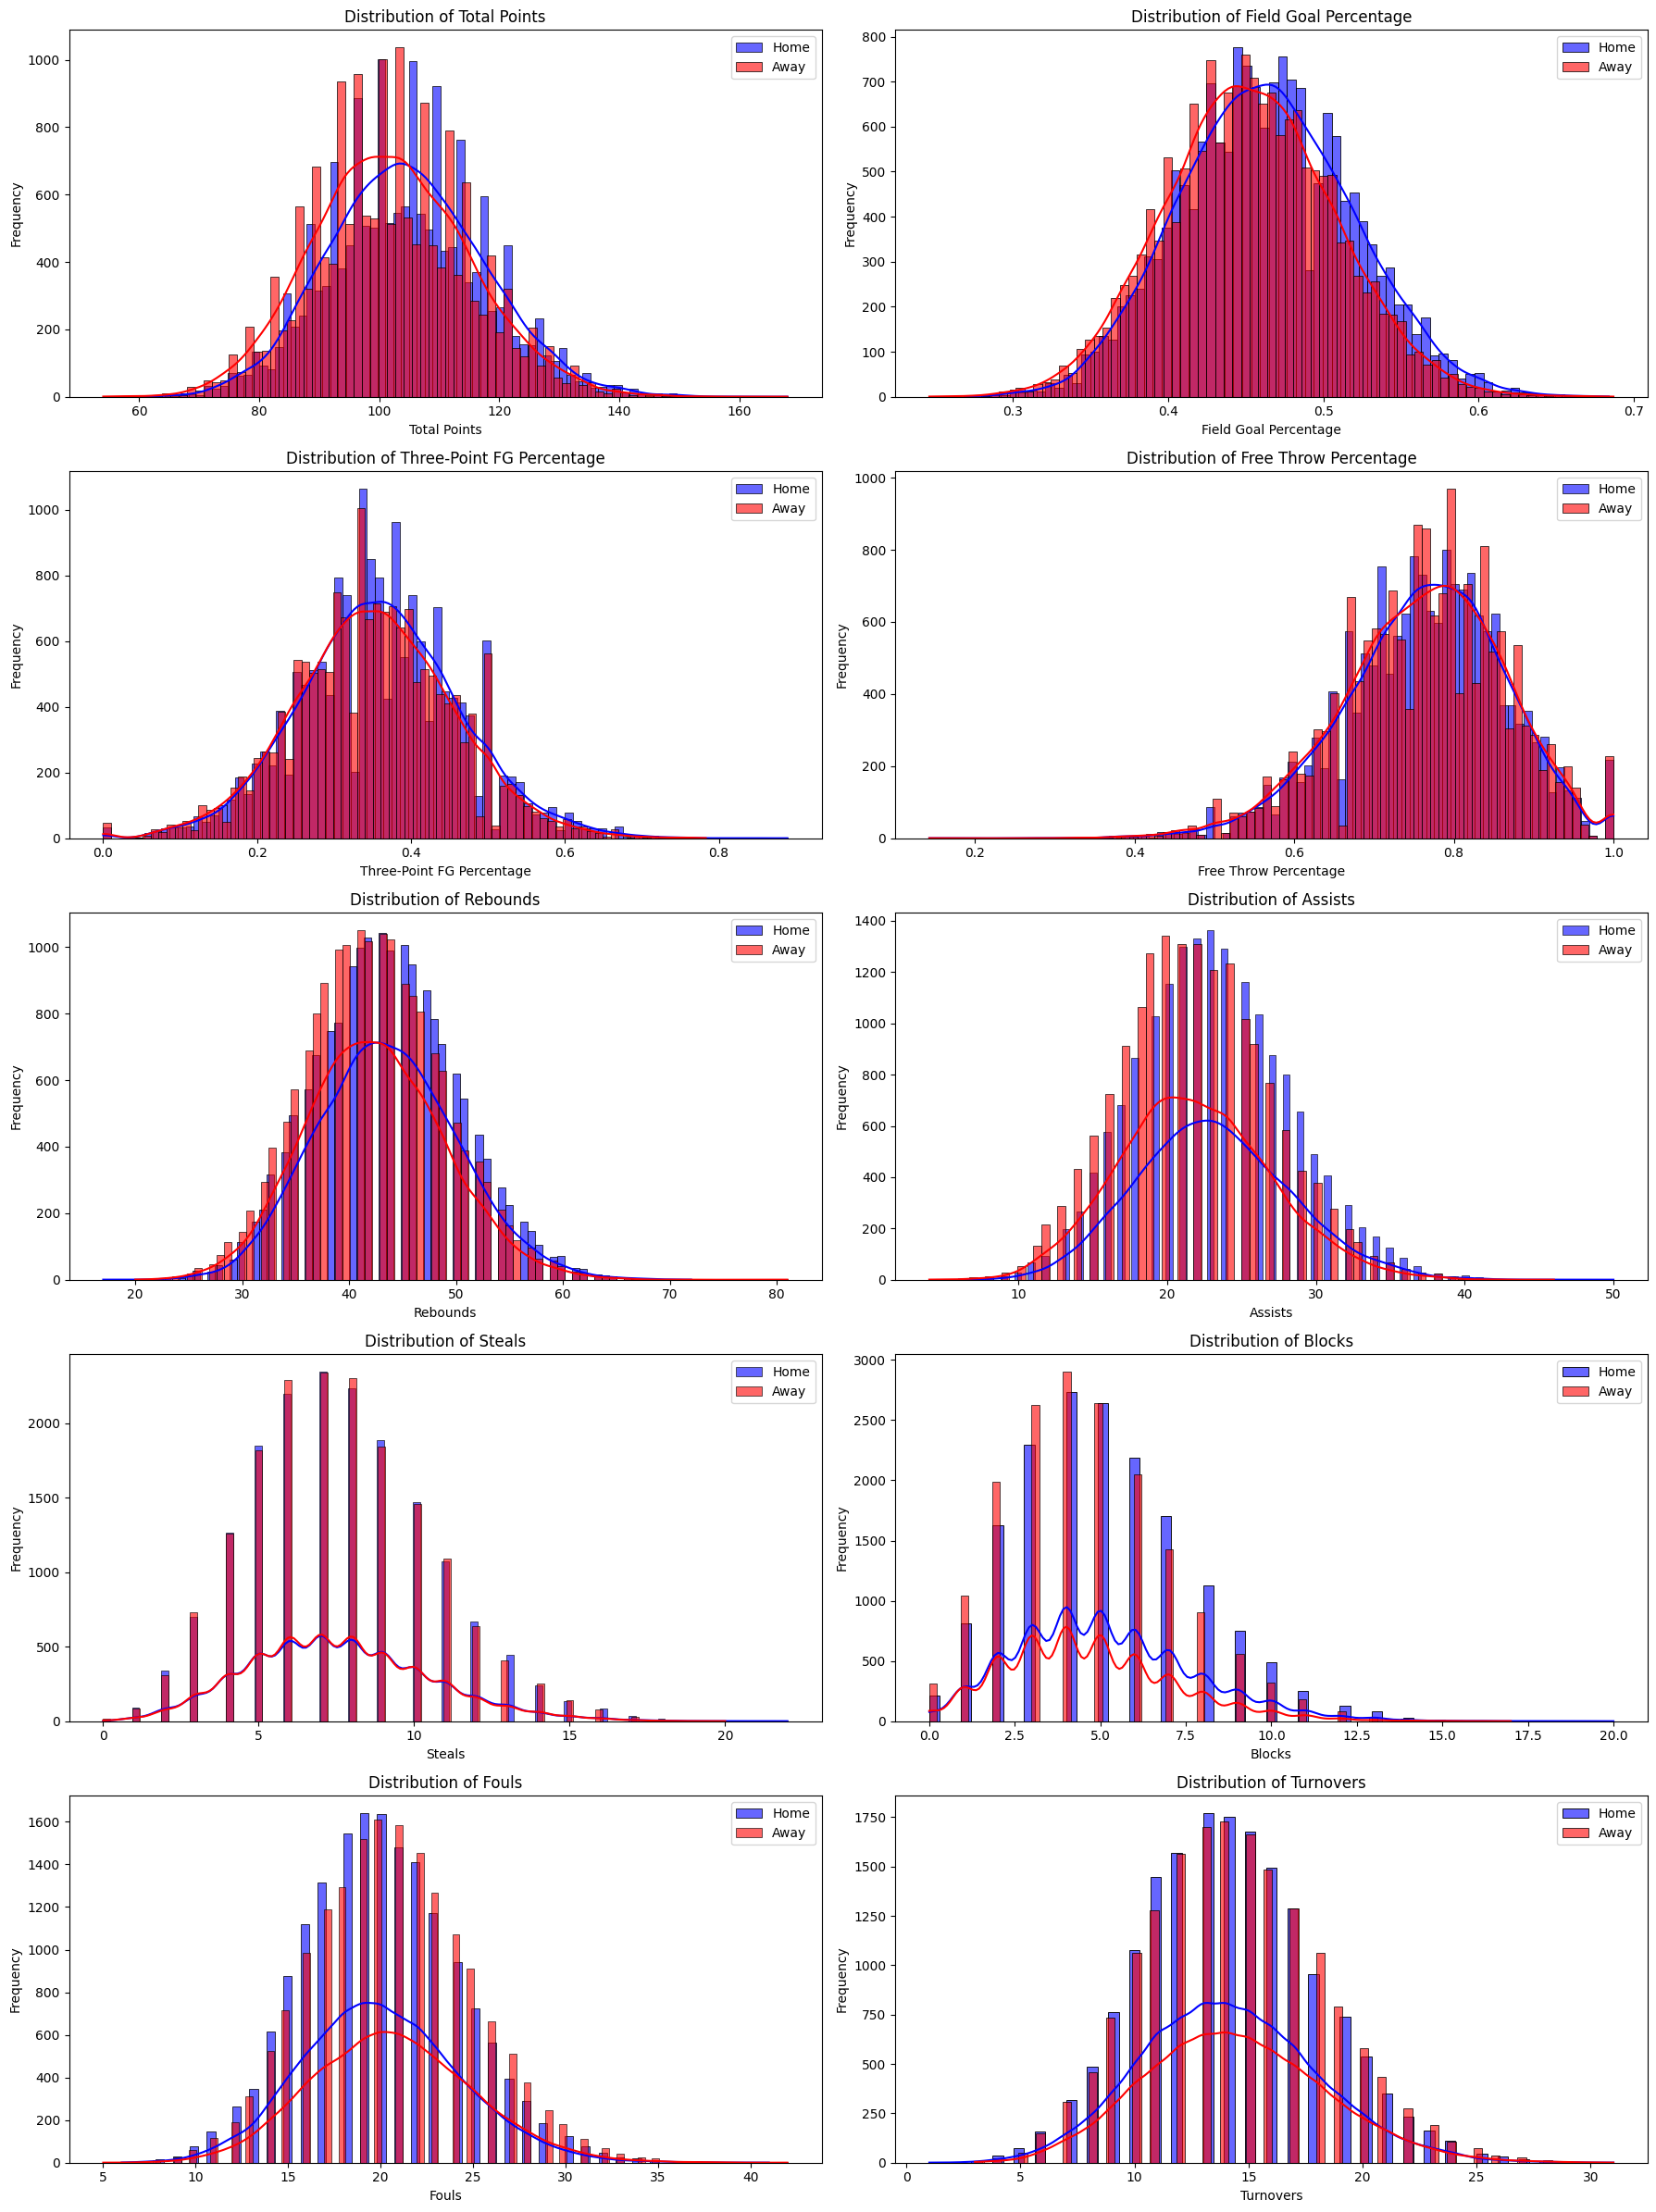

In [11]:
# Define key metrics for both home and away teams
metrics = {
    'Total Points': ('PTS_HOME', 'PTS_AWAY'),
    'Field Goal Percentage': ('FG_PCT_HOME', 'FG_PCT_AWAY'),
    'Three-Point FG Percentage': ('FG3_PCT_HOME', 'FG3_PCT_AWAY'),
    'Free Throw Percentage': ('FT_PCT_HOME', 'FT_PCT_AWAY'),
    'Rebounds': ('REB_HOME', 'REB_AWAY'),
    'Assists': ('AST_HOME', 'AST_AWAY'),
    'Steals': ('STL_HOME', 'STL_AWAY'),
    'Blocks': ('BLK_HOME', 'BLK_AWAY'),
    'Fouls': ('PF_HOME', 'PF_AWAY'),
    'Turnovers': ('TOV_HOME', 'TOV_AWAY'),
}

# Plot the distribution for each metric
plt.figure(figsize=(18, 24))

for i, (metric_name, (home_col, away_col)) in enumerate(metrics.items(), 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[home_col], kde=True, color='blue', label='Home', alpha=0.6)
    sns.histplot(df[away_col], kde=True, color='red', label='Away', alpha=0.6)
    plt.title(f'Distribution of {metric_name}')
    plt.xlabel(metric_name)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
### Home vs Away Win Rates

Home Win Percentage: 0.59
Away Win Percentage: 0.41


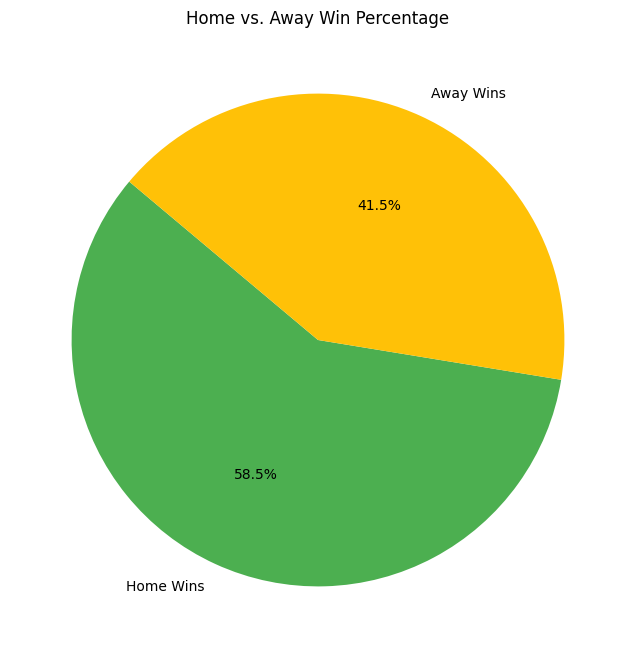

In [13]:
# Calculate the percentage of wins
home_win_percentage = df['Win'].mean()
away_win_percentage = 1 - home_win_percentage

# Print the results
print(f"Home Win Percentage: {home_win_percentage:.2f}")
print(f"Away Win Percentage: {away_win_percentage:.2f}")

# Data for pie chart
labels = ['Home Wins', 'Away Wins']
sizes = [home_win_percentage, away_win_percentage]
colors = ['#4CAF50', '#FFC107']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Home vs. Away Win Percentage')
plt.show()

In [14]:
totat_pts = df['TOTAL_PTS'] = df['PTS_HOME'] + df['PTS_AWAY']
totat_pts_summary = totat_pts.describe()

In [15]:
betting_metrics = df[['POINT_DIFF', 'HomeSpread_AtClose', 'Over_AtClose', 'HomeML', 'AwayML', 'HomeML_Prob', 'AwayML_Prob']]
betting_metrics_summary = betting_metrics.describe()
betting_metrics_summary

POINT_DIFF  HomeSpread_AtClose  Over_AtClose        HomeML  \
count  17113.000000        17113.000000   17113.00000  17113.000000   
mean       2.663063           -2.821094     206.21507   -262.644481   
std       13.629157            6.546269      13.72578    704.433930   
min      -57.000000          -21.500000     170.50000 -13000.000000   
25%       -7.000000           -7.500000     195.50000   -350.000000   
50%        4.000000           -3.500000     205.50000   -170.000000   
75%       11.000000            2.500000     216.00000    125.000000   
max       73.000000           18.000000     251.00000   3000.000000   

             AwayML   HomeML_Prob   AwayML_Prob  
count  17113.000000  1.711300e+04  1.711300e+04  
mean     126.153772  7.217866e-01  4.871916e-01  
std      444.779788  2.639618e-01  3.019277e-01  
min    -9900.000000  5.623413e-08  1.000000e-16  
25%     -145.000000  4.640841e-01  2.563655e-01  
50%      145.000000  8.255260e-01  4.355995e-01  
75%      285.000000  9.302417e-01  8.038185e-01  
max     6500.000000  1.000000e+00  1.000000e+00

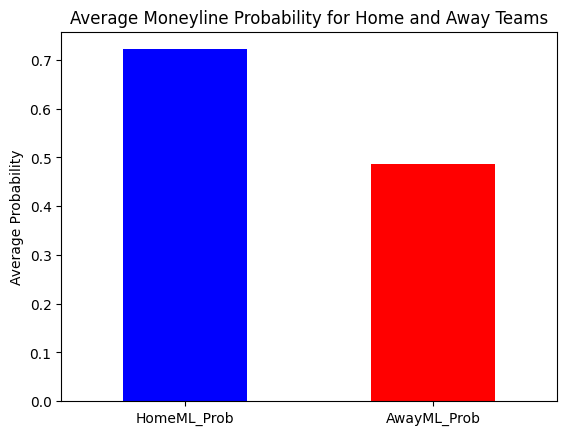

In [16]:
# Calculate and visualize the average moneyline probability for home and away teams
moneyline_avg = df[['HomeML_Prob', 'AwayML_Prob']].mean()
moneyline_avg.plot(kind='bar', color=['blue', 'red'])
plt.title('Average Moneyline Probability for Home and Away Teams')
plt.ylabel('Average Probability')
plt.xticks(rotation=0)
plt.show()

### Distribution of Games per Season

Distribution of Games per Season:
    Season  Number of Games
0    22008             1230
1    22009             1230
2    22010             1230
3    22013             1230
4    22016             1230
5    22015             1230
6    22014             1230
7    22018             1230
8    22017             1230
9    22007             1229
10   22012             1229
11   22020             1079
12   22019             1059
13   22011              990
14   22021              457


C:\Users\Christian\AppData\Local\Temp\ipykernel_3360\2541503142.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='SEASON_ID', data=df, palette='viridis')


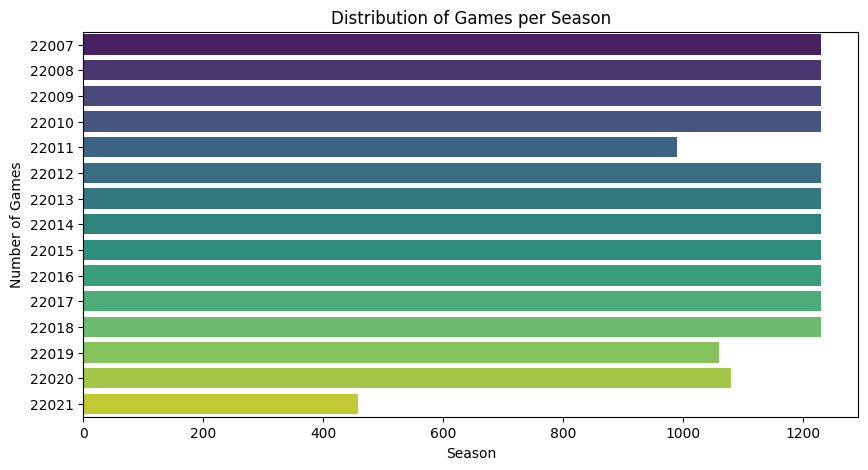

In [17]:
# Distribution of Games per Season 
season_distribution = df['SEASON_ID'].value_counts().reset_index()
season_distribution.columns = ['Season', 'Number of Games']
season_distribution = season_distribution.sort_values(by='Number of Games', ascending=False).reset_index(drop=True)

# Display the tables
print("Distribution of Games per Season:")
print(season_distribution)

# Visualization
plt.figure(figsize=(10, 5))
sns.countplot(y='SEASON_ID', data=df, palette='viridis')
plt.title('Distribution of Games per Season')
plt.xlabel('Season')
plt.ylabel('Number of Games')
plt.show()

### Distribution of Games per Team 


Distribution of Games per Team:
Portland Trail Blazers    1145
Milwaukee Bucks           1145
Memphis Grizzlies         1145
Philadelphia 76ers        1144
Sacramento Kings          1144
Orlando Magic             1144
Dallas Mavericks          1144
Indiana Pacers            1143
Miami Heat                1143
Washington Wizards        1143
Houston Rockets           1143
Denver Nuggets            1142
Utah Jazz                 1142
Phoenix Suns              1142
Boston Celtics            1141
Toronto Raptors           1141
Los Angeles Lakers        1141
San Antonio Spurs         1141
Atlanta Hawks             1136
Cleveland Cavaliers       1136
New York Knicks           1136
Golden State Warriors     1136
Detroit Pistons           1135
Chicago Bulls             1134
Minnesota Timberwolves    1133
Oklahoma City Thunder     1059
Brooklyn Nets              748
New Orleans Pelicans       667
Los Angeles Clippers       640
Charlotte Hornets          580
Charlotte Bobcats          558
LA Cli

C:\Users\Christian\AppData\Local\Temp\ipykernel_3360\2376227453.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=total_games_per_team.index, x=total_games_per_team.values, palette='coolwarm')


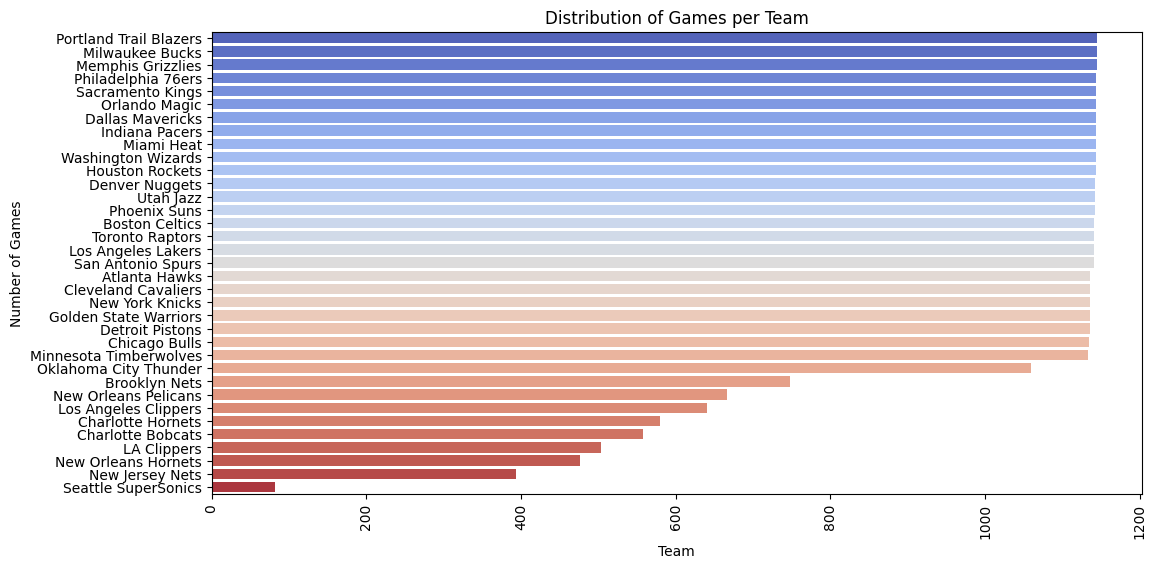

In [18]:
# Counting games played by each team as home and away teams
home_games_per_team = df['TEAM_NAME_HOME'].value_counts()
away_games_per_team = df['TEAM_NAME_AWAY'].value_counts()

# Combine home and away games
total_games_per_team = home_games_per_team.add(away_games_per_team, fill_value=0).sort_values(ascending=False)

print("\nDistribution of Games per Team:")
print(total_games_per_team)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(y=total_games_per_team.index, x=total_games_per_team.values, palette='coolwarm')
plt.title('Distribution of Games per Team')
plt.xlabel('Team')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

## 2. Correlation Analysis @Jep

We examined correlations between different statistical measures to identify which metrics had the most influence on winning games. This included looking at various performance metrics and how they interrelate. Key areas of focus included:

- Team Shooting Accuracy: Analysis of field goal percentage, three-point shooting, and free throw efficiency.
- Turnovers and Assists: Relationship between turnovers, assists, and game results.
- Effective Metrics: Effective field goal percentage and other advanced metrics.


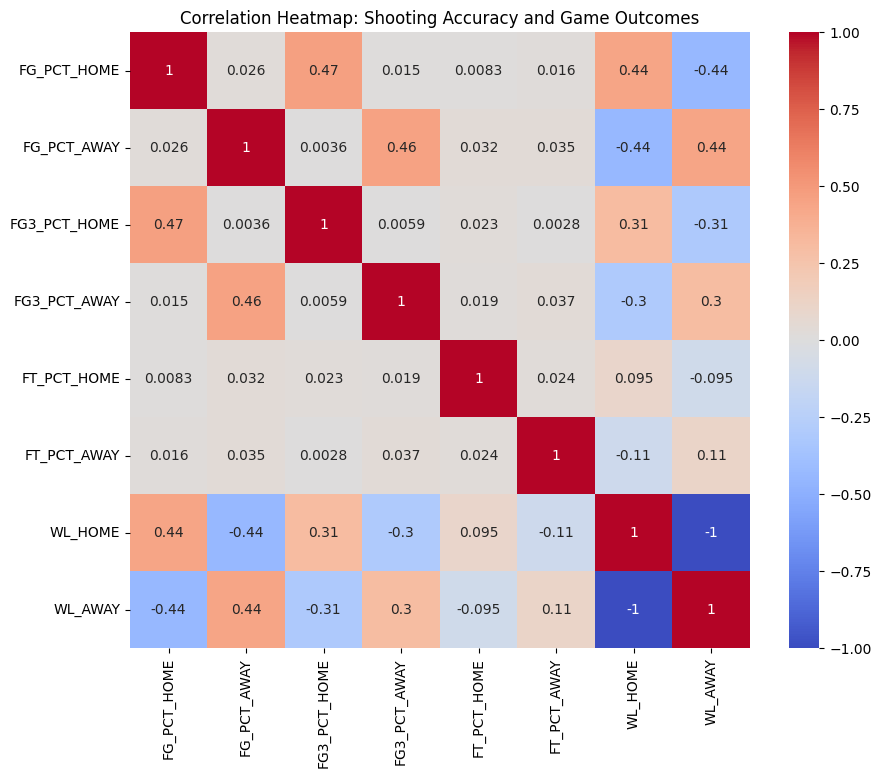

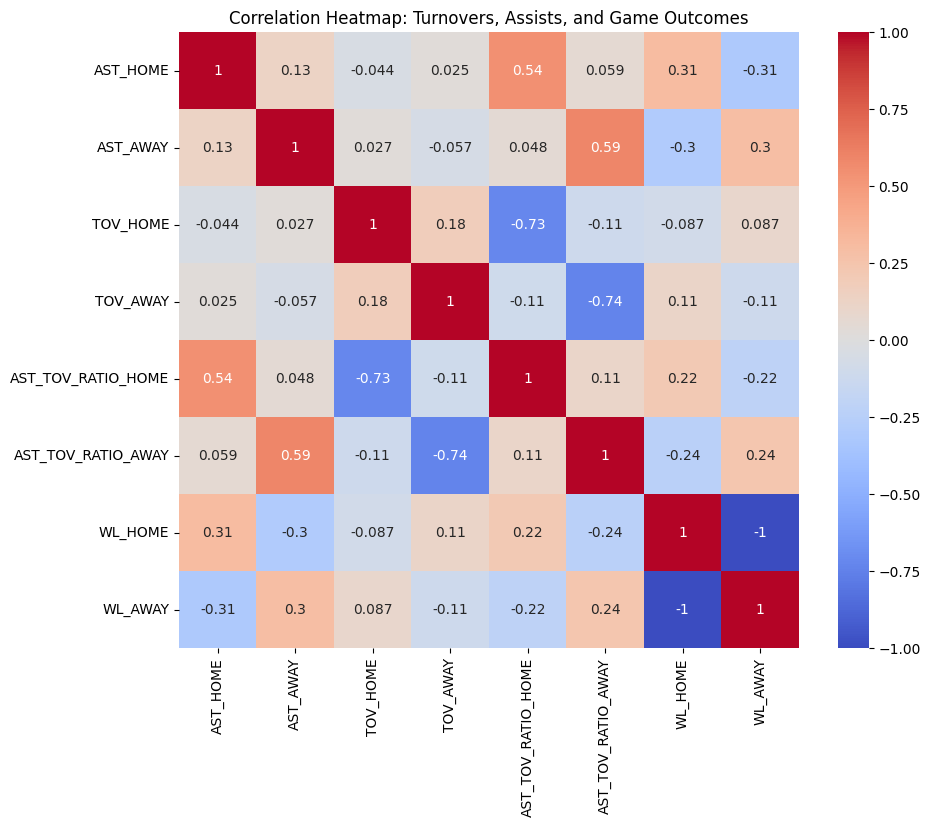

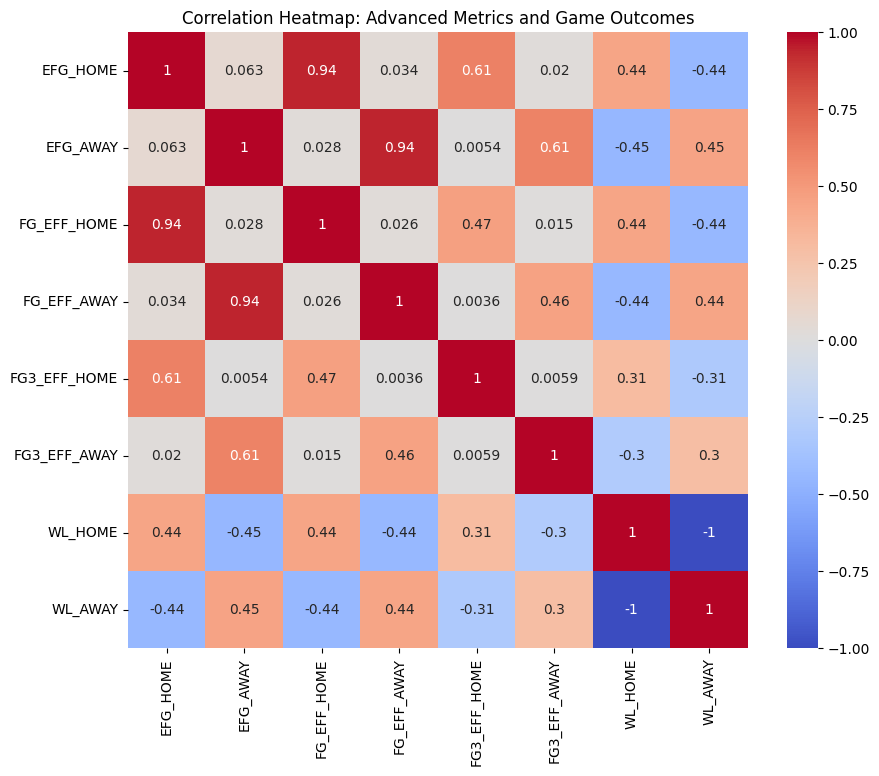

In [19]:
# convert 'W' and 'L' to numeric values
df['WL_HOME'] = df['WL_HOME'].map({'W': 1, 'L': 0})
df['WL_AWAY'] = df['WL_AWAY'].map({'W': 1, 'L': 0})

#correlation analysis for shooting accuracy 

shooting_metrics = ['FG_PCT_HOME', 'FG_PCT_AWAY', 'FG3_PCT_HOME', 'FG3_PCT_AWAY', 'FT_PCT_HOME', 'FT_PCT_AWAY', 'WL_HOME', 'WL_AWAY']
corr_shooting = df[shooting_metrics].corr()

#visualization 

plt.figure(figsize=(10,8))
sns.heatmap(corr_shooting, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Shooting Accuracy and Game Outcomes')
plt.show()

#correlation analysis for turnovers and assists

turnover_assists_metrics = ['AST_HOME', 'AST_AWAY', 'TOV_HOME', 'TOV_AWAY', 'AST_TOV_RATIO_HOME', 'AST_TOV_RATIO_AWAY', 'WL_HOME', 'WL_AWAY']
corr_turnover_assists = df[turnover_assists_metrics].corr()

#visualization

plt.figure(figsize=(10,8))
sns.heatmap(corr_turnover_assists, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Turnovers, Assists, and Game Outcomes')
plt.show()

# correlation Analysis for advanced metrics
advanced_metrics = ['EFG_HOME', 'EFG_AWAY', 'FG_EFF_HOME', 'FG_EFF_AWAY', 'FG3_EFF_HOME', 'FG3_EFF_AWAY', 'WL_HOME', 'WL_AWAY']
corr_advanced = df[advanced_metrics].corr()

# visualization
plt.figure(figsize=(10, 8))

sns.heatmap(corr_advanced, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Advanced Metrics and Game Outcomes')
plt.show()

## 3. Time Series Analysis @Mark

Given the dynamic nature of sports, where team performance can vary significantly from season to season, we analyzed the data across different time periods to capture any temporal effects on game outcomes. This analysis aimed to:

- Seasonal Trends: Observe how team performance metrics change over different seasons.
- Performance Variations: Identify any trends or patterns in performance metrics throughout the season.
- Rolling Averages: Use rolling averages to smooth out performance data and capture trends over time.

### 3.1. Seasonal Trends

To observe how team performance metrics change over different seasons, we can create multiple plots to visualize different aspects of performance:

#### 3.1.1 Average Points Scored Per Season

This plot shows the average points scored by nba team, home, and away teams for each season.

##### Home vs Away

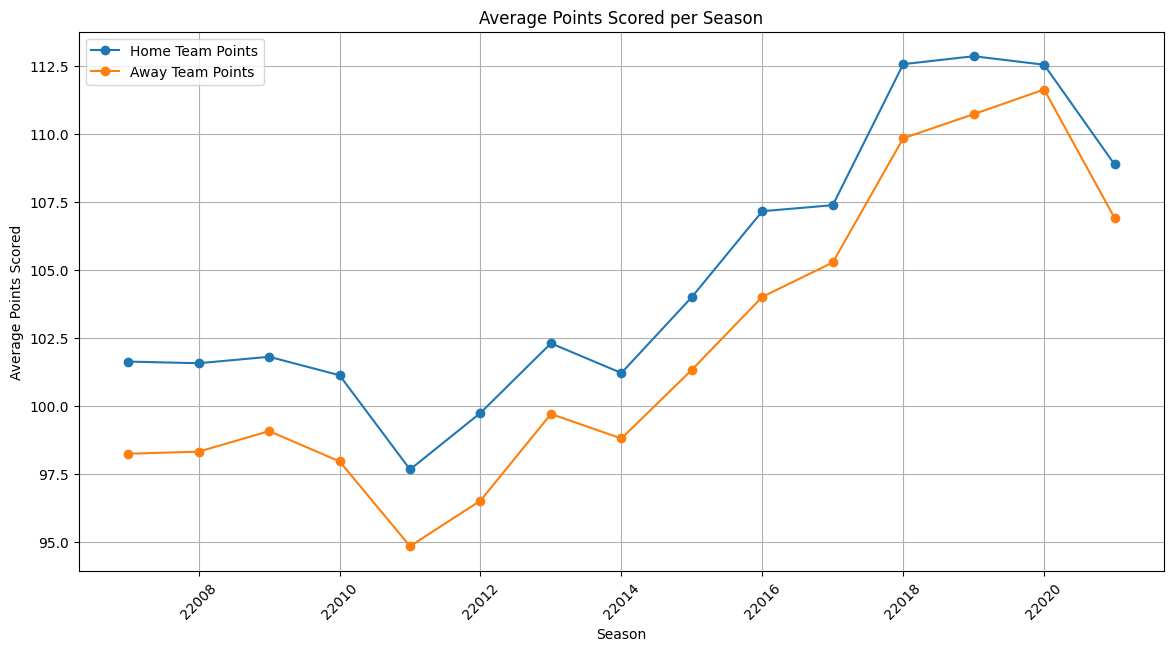

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'GAME_DATE' is a datetime type and 'SEASON_ID' is categorical or similar
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])

# Group by season and calculate average points scored per game
seasonal_points = df.groupby('SEASON_ID').agg({
    'PTS_HOME': 'mean',
    'PTS_AWAY': 'mean'
}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(seasonal_points['SEASON_ID'], seasonal_points['PTS_HOME'], marker='o', label='Home Team Points')
plt.plot(seasonal_points['SEASON_ID'], seasonal_points['PTS_AWAY'], marker='o', label='Away Team Points')
plt.title('Average Points Scored per Season')
plt.xlabel('Season')
plt.ylabel('Average Points Scored')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#### 3.1.2 Average Rebounds Per Season

This plot shows the average number of rebounds per game for the home and away teams across seasons.

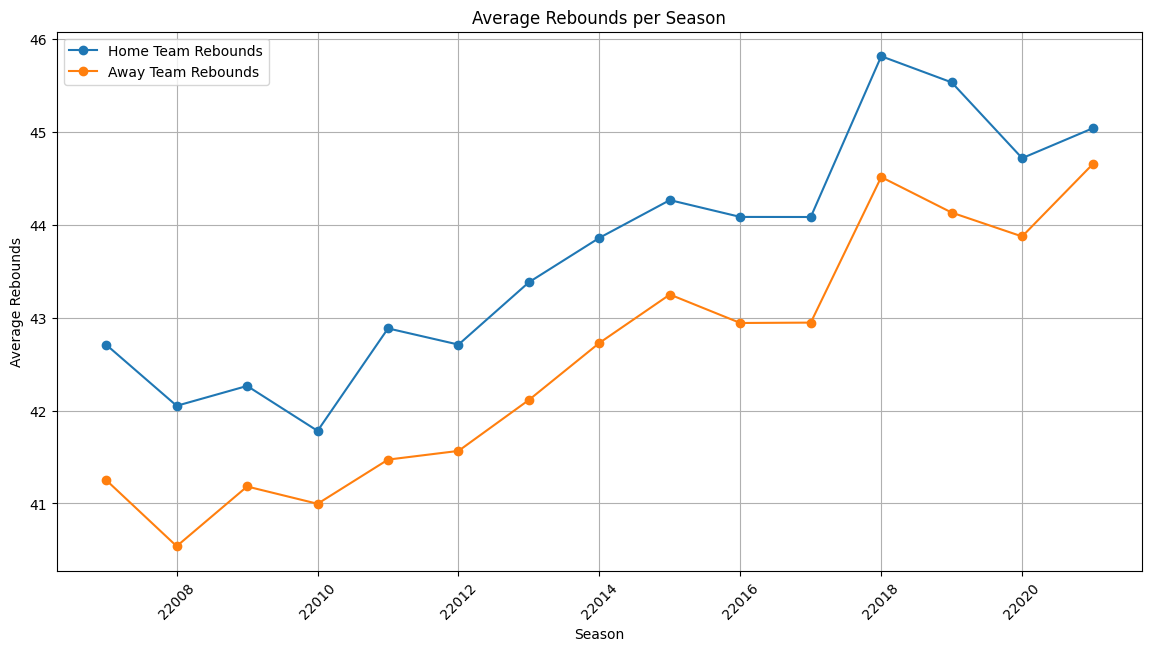

In [21]:
# Group by season and calculate average rebounds per game
seasonal_rebounds = df.groupby('SEASON_ID').agg({
    'REB_HOME': 'mean',
    'REB_AWAY': 'mean'
}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(seasonal_rebounds['SEASON_ID'], seasonal_rebounds['REB_HOME'], marker='o', label='Home Team Rebounds')
plt.plot(seasonal_rebounds['SEASON_ID'], seasonal_rebounds['REB_AWAY'], marker='o', label='Away Team Rebounds')
plt.title('Average Rebounds per Season')
plt.xlabel('Season')
plt.ylabel('Average Rebounds')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#### 3.1.3 Average Field Goal Percentage Per Season

This plot displays the average field goal percentage for home and away teams across different seasons.

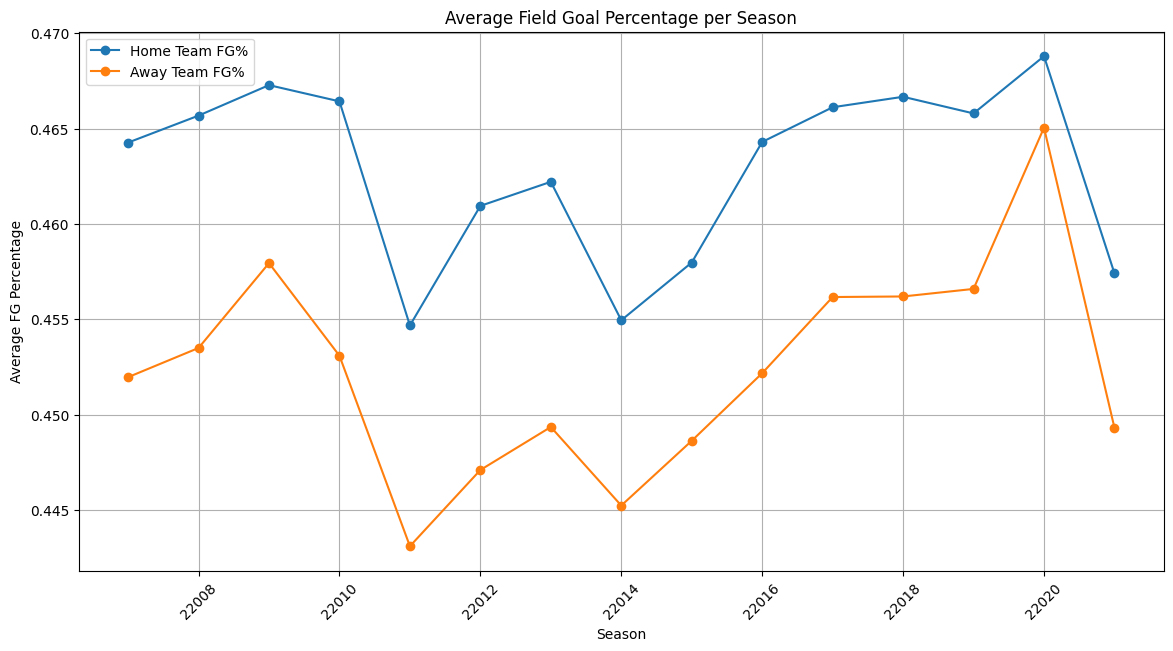

In [22]:
# Group by season and calculate average field goal percentage
seasonal_fg_pct = df.groupby('SEASON_ID').agg({
    'FG_PCT_HOME': 'mean',
    'FG_PCT_AWAY': 'mean'
}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(seasonal_fg_pct['SEASON_ID'], seasonal_fg_pct['FG_PCT_HOME'], marker='o', label='Home Team FG%')
plt.plot(seasonal_fg_pct['SEASON_ID'], seasonal_fg_pct['FG_PCT_AWAY'], marker='o', label='Away Team FG%')
plt.title('Average Field Goal Percentage per Season')
plt.xlabel('Season')
plt.ylabel('Average FG Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

##### This plot visualizes the points scored by specific NBA teams (e.g., Los Angeles Lakers, Boston Celtics, Golden State Warriors) over different seasons. The analysis is split between home and away games, allowing us to observe how these teams' performance metrics change across different time periods. Key patterns, such as consistent improvements or declines, are highlighted to understand long-term trends.

**X-axis:** Date  
**Y-axis:** Points Scored  
**Lines:** Separate lines for home and away performances for each team.

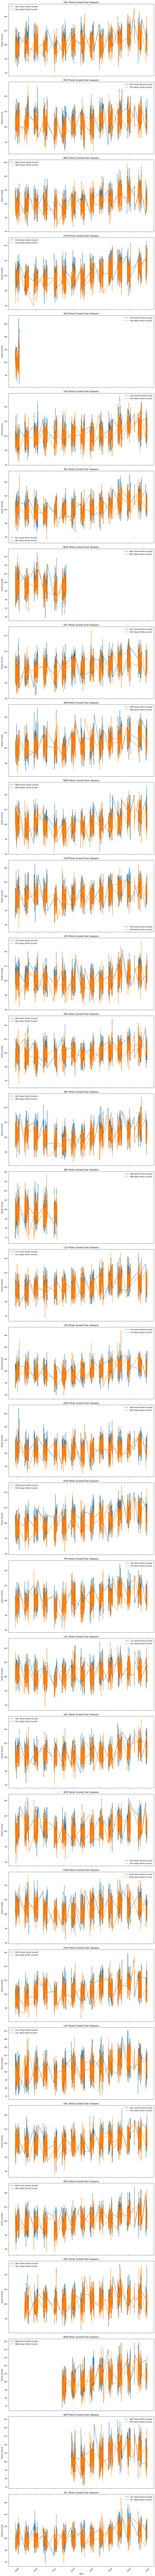

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your dataframe containing the NBA dataset

# Convert 'GAME_DATE' to datetime format and set as index
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])
df.set_index('GAME_DATE', inplace=True)

# Filter data for specific NBA teams (e.g., 'LAL' for Los Angeles Lakers)
teams = [
    "DAL", "PHX", "WAS", "CHA", "SEA", "SAS", "MIL", "NOH", "DET", "MIN",
    "MEM", "TOR", "UTA", "MIA", "IND", "NJN", "CLE", "CHI", "DEN", "POR",
    "PHI", "LAL", "SAC", "NYK", "GSW", "HOU", "LAC", "ORL", "BOS", "OKC",
    "BKN", "NOP", "ATL"
]
filtered_df = df[(df['TEAM_ABBREVIATION_HOME'].isin(teams)) | (df['TEAM_ABBREVIATION_AWAY'].isin(teams))]

# Function to plot performance metrics for home and away teams
def plot_time_series(data, team, metric_home, metric_away, title, ylabel, ax):
    sns.lineplot(data=data, x=data.index, y=metric_home, label=f'{team} Home {ylabel}', ax=ax)
    sns.lineplot(data=data, x=data.index, y=metric_away, label=f'{team} Away {ylabel}', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.xticks(rotation=45)

# Seasonal Trends: Team performance over different seasons
fig, axs = plt.subplots(len(teams), 1, figsize=(12, 6 * len(teams)), sharex=True)
for i, team in enumerate(teams):
    team_data = filtered_df[(filtered_df['TEAM_ABBREVIATION_HOME'] == team) | 
                            (filtered_df['TEAM_ABBREVIATION_AWAY'] == team)]
    plot_time_series(team_data, team, 'PTS_HOME', 'PTS_AWAY', 
                     f'{team} Points Scored Over Seasons', 'Points Scored', axs[i])
plt.tight_layout()
plt.show()